# **Часть 1. Какие ключевые шаги необходимо выполнить для анализа результатов методом Bootstrap после эксперимента?**

Метод Bootstrap — один из самых эффективных способов анализа данных, особенно когда требуется оценить параметры выборки или построить доверительные интервалы без предположений о распределении данных. После проведения эксперимента я бы выделил следующие ключевые шаги, которые необходимо выполнить для анализа результатов методом Bootstrap.

---

### Шаг 1. Определение цели анализа

Первым делом я уточняю, какую задачу нужно решить. Например, это может быть:
- Оценка среднего значения метрики;
- Построение доверительного интервала;
- Проверка различий между выборками (например, при A/B тестировании).

В моем случае это может быть задача построения доверительного интервала для среднего значения конверсии после проведения эксперимента.

---

### Шаг 2. Формирование Bootstrap-семплов

Bootstrap основывается на повторной выборке с возвращением. Это означает, что из исходной выборки создаются подвыборки того же размера, где одно и то же значение может встречаться несколько раз. Я генерирую множество таких семплов, которые в дальнейшем будут использоваться для анализа.

Пример: если в моей выборке есть данные `[10, 12, 15, 14, 13]`, то один из таких семплов может выглядеть как `[15, 10, 12, 12, 13]`.

---

### Шаг 3. Вычисление статистики для каждого семпла

Для каждого из созданных семплов я рассчитываю статистику, которая интересует в данном исследовании. Это может быть среднее, медиана, стандартное отклонение или любая другая метрика. Важно, чтобы расчет был выполнен для всех семплов, чтобы можно было построить распределение значений этой статистики.

---

### Шаг 4. Построение распределения статистики

После того как все семплы обработаны, я получаю распределение выбранной метрики. Это распределение позволяет увидеть, как варьируется значение статистики. Например, если я рассчитываю среднее, то распределение покажет его возможные значения в различных условиях.

---

### Шаг 5. Построение доверительных интервалов

На основе распределения я строю доверительные интервалы. Чаще всего я использую метод процентилей: выбираю границы, которые охватывают 95% значений (от 2.5% до 97.5%). Это дает ясное представление о том, как изменяется метрика и насколько надежны результаты.

---

### Шаг 6. Интерпретация результатов

Последним этапом я анализирую полученные результаты. Если я строю доверительный интервал для среднего значения, то проверяю, находится ли оно в рамках допустимых значений. Если проводится сравнение двух выборок, то смотрю на их распределения и доверительные интервалы, чтобы сделать вывод о статистической значимости различий.

---

## Пример выполнения анализа методом Bootstrap

Для наглядности приведу пример, где я оцениваю доверительный интервал для среднего значения выборки:


Среднее по исходной выборке: 12.8
Доверительный интервал (95%): [11.  14.2]


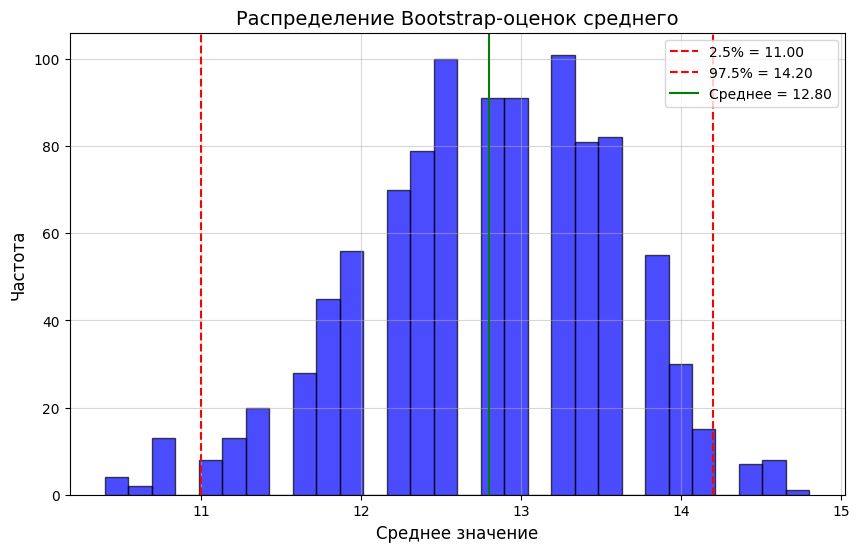

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
data = np.array([10, 12, 15, 14, 13])

# Количество Bootstrap-семплов
n_bootstrap = 1000

# Генерация Bootstrap-семплов и расчет средних
bootstrap_means = []
for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Построение распределения статистики
bootstrap_means = np.array(bootstrap_means)

# Построение доверительного интервала
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Результаты
print(f"Среднее по исходной выборке: {np.mean(data)}")
print(f"Доверительный интервал (95%): {conf_interval}")

# Построение графика
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(conf_interval[0], color='red', linestyle='--', label=f'2.5% = {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='red', linestyle='--', label=f'97.5% = {conf_interval[1]:.2f}')
plt.axvline(np.mean(data), color='green', linestyle='-', label=f'Среднее = {np.mean(data):.2f}')
plt.title('Распределение Bootstrap-оценок среднего', fontsize=14)
plt.xlabel('Среднее значение', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

## **Часть 2: Ответ на вопросы по методу Bootstrap**

### 1. Ключевые шаги для анализа результатов методом Bootstrap
Метод Bootstrap позволяет оценить статистические свойства выборки путем генерации повторных выборок с возвращением из исходных данных. Основные этапы анализа методом Bootstrap:
1. **Создание Bootstrap-выборок:** Сгенерировать несколько подвыборок с возвращением из исходной выборки.
2. **Вычисление статистик:** Для каждой Bootstrap-выборки вычислить интересующую статистику (например, среднее, медиану, стандартное отклонение).
3. **Оценка распределения:** Получить распределение оценок статистики на основе всех Bootstrap-выборок.
4. **Построение доверительных интервалов:** Используя распределение, определить доверительные интервалы для статистики.
5. **Вывод:** Интерпретировать результаты в контексте исследуемой задачи.

---

### 2. Преимущества метода Bootstrap
1. **Гибкость:** Метод может применяться для оценки сложных статистик, даже когда классические методы невозможны.
2. **Минимальные предположения:** Bootstrap не требует предположений о распределении данных.
3. **Простота реализации:** Легко реализуется программно для любых объемов данных.
4. **Подходит для небольших выборок:** Метод работает даже с ограниченным количеством данных.

---

### 3. Метрики для использования метода Bootstrap
Метод Bootstrap позволяет работать с различными метриками, такими как:
- Среднее значение (Mean)
- Медиана (Median)
- Стандартное отклонение (Standard Deviation)
- Коэффициенты регрессии
- Квантили
- Дисперсия (Variance)
- Корреляция

---

### 4. Размер Bootstrap-выборок
Размер каждой Bootstrap-выборки должен быть равен размеру исходной выборки. Это необходимо для того, чтобы сохранялась структура данных.

---

### 5. Повторное использование значений
Да, в Bootstrap выборках одно и то же значение из исходной выборки может использоваться несколько раз. Это называется выборкой с возвращением, что является ключевым элементом метода.

---

## Пример реализации метода Bootstrap на Python
Ниже представлен код для демонстрации метода Bootstrap.


Оригинальное среднее: 96.62
95% Доверительный интервал для среднего: [ 92.73088733 100.67589661]


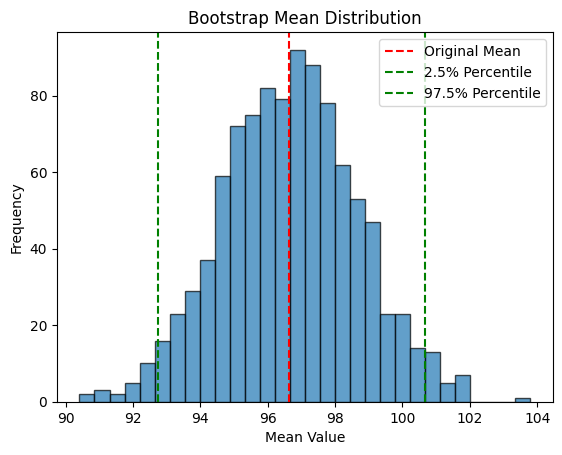

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
np.random.seed(42)  # Фиксируем случайность для воспроизводимости
data = np.random.normal(loc=100, scale=15, size=50)  # Пример выборки

# Параметры Bootstrap
n_iterations = 1000  # Количество итераций Bootstrap
sample_size = len(data)  # Размер выборки равен исходной выборке

# Функция для генерации Bootstrap-выборок и оценки средней
bootstrap_means = []
for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(data, size=sample_size, replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Анализ результатов
mean_original = np.mean(data)
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Вывод результатов
print(f"Оригинальное среднее: {mean_original:.2f}")
print(f"95% Доверительный интервал для среднего: {confidence_interval}")

# Визуализация распределения Bootstrap-оценок
plt.hist(bootstrap_means, bins=30, alpha=0.7, edgecolor='k')
plt.axvline(mean_original, color='red', linestyle='--', label='Original Mean')
plt.axvline(confidence_interval[0], color='green', linestyle='--', label='2.5% Percentile')
plt.axvline(confidence_interval[1], color='green', linestyle='--', label='97.5% Percentile')
plt.title("Bootstrap Mean Distribution")
plt.xlabel("Mean Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()
